In [1]:
#Imortation des bibliothèques pour l'analyse des données
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import folium
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import HeatMapWithTime


In [2]:
data = pd.read_csv('Crash_Reporting_-_Incidents_Data.csv')


/var/folders/z3/l2fngtm57qb349dkh5432_xw0000gn/T/ipykernel_17499/1965410575.py:1: DtypeWarning: Columns (9,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Crash_Reporting_-_Incidents_Data.csv')


In [3]:
#recherche de la colonne 'Non-Motorist Substance Abuse' dans le dataset
print(data['Non-Motorist Substance Abuse'].value_counts())
print(data['Non-Motorist Substance Abuse'].isnull().sum())


Non-Motorist Substance Abuse
NONE DETECTED                                                                                                                                                    3811
Not Suspect of Alcohol Use, Not Suspect of Drug Use                                                                                                               319
UNKNOWN                                                                                                                                                           219
ALCOHOL PRESENT                                                                                                                                                   147
ALCOHOL CONTRIBUTED                                                                                                                                                39
N/A, NONE DETECTED                                                                                                                           

In [4]:
#affichage des colonnes du dataset
print(data.columns)

Index(['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type',
       'Crash Date/Time', 'Hit/Run', 'Route Type', 'Lane Direction',
       'Lane Type', 'Number of Lanes', 'Direction', 'Distance',
       'Distance Unit', 'Road Grade', 'Road Name', 'Cross-Street Name',
       'Off-Road Description', 'Municipality', 'Related Non-Motorist',
       'At Fault', 'Collision Type', 'Weather', 'Surface Condition', 'Light',
       'Traffic Control', 'Driver Substance Abuse',
       'Non-Motorist Substance Abuse', 'First Harmful Event',
       'Second Harmful Event', 'Junction', 'Intersection Type',
       'Road Alignment', 'Road Condition', 'Road Division', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')


In [5]:
data = data.drop(columns=['Non-Motorist Substance Abuse'])
print(data.columns)

Index(['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type',
       'Crash Date/Time', 'Hit/Run', 'Route Type', 'Lane Direction',
       'Lane Type', 'Number of Lanes', 'Direction', 'Distance',
       'Distance Unit', 'Road Grade', 'Road Name', 'Cross-Street Name',
       'Off-Road Description', 'Municipality', 'Related Non-Motorist',
       'At Fault', 'Collision Type', 'Weather', 'Surface Condition', 'Light',
       'Traffic Control', 'Driver Substance Abuse', 'First Harmful Event',
       'Second Harmful Event', 'Junction', 'Intersection Type',
       'Road Alignment', 'Road Condition', 'Road Division', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')


In [6]:
# Vérifier si la colonne 'Non-Motorist Substance Abuse' existe avant de la supprimer
if 'Non-Motorist Substance Abuse' in data.columns:
    data = data.drop(['Non-Motorist Substance Abuse'], axis=1)
else:
    print("La colonne 'Non-Motorist Substance Abuse' n'existe pas dans le DataFrame")

print(data.shape)
df = data
print(df.columns)

La colonne 'Non-Motorist Substance Abuse' n'existe pas dans le DataFrame
(103821, 36)
Index(['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type',
       'Crash Date/Time', 'Hit/Run', 'Route Type', 'Lane Direction',
       'Lane Type', 'Number of Lanes', 'Direction', 'Distance',
       'Distance Unit', 'Road Grade', 'Road Name', 'Cross-Street Name',
       'Off-Road Description', 'Municipality', 'Related Non-Motorist',
       'At Fault', 'Collision Type', 'Weather', 'Surface Condition', 'Light',
       'Traffic Control', 'Driver Substance Abuse', 'First Harmful Event',
       'Second Harmful Event', 'Junction', 'Intersection Type',
       'Road Alignment', 'Road Condition', 'Road Division', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')


In [7]:
#Talbleau avec valeur unique du type d'Accident
print(data['ACRS Report Type'].value_counts())
print(data['ACRS Report Type'].isnull().sum())

ACRS Report Type
Property Damage Crash    68181
Injury Crash             35318
Fatal Crash                322
Name: count, dtype: int64
0


In [8]:
#data set sur les crash de type Injury Crash sur l'année 2020
df = data[(data['ACRS Report Type'] == 'Injury Crash') & (data['Crash Date/Time'].str.contains('2020'))]

#plus grandes valeurs de la colonne longitude et latitude
#print(df['Longitude'].max())
#print(df['Latitude'].max())

#cart de point de crash de type Injury Crash sur l'année 2020
df = df.dropna(subset=['Latitude', 'Longitude'])
map = folium.Map(location=[38.9, -77.05], zoom_start=11)

if df.shape[0] > 0:
    for index, row in df.iterrows():
        folium.CircleMarker([row['Latitude'], row['Longitude']], radius=3, color='blue', fill=True, fill_color='blue', fill_opacity=0.6).add_to(map)

map

print(df['ACRS Report Type'].value_counts())
print(df['ACRS Report Type'].isnull().sum())





ACRS Report Type
Injury Crash    2658
Name: count, dtype: int64
0


In [9]:
#Affichage des 5 premières et 5 dernières lignes du dataset
data.head


<bound method NDFrame.head of        Report Number Local Case Number                Agency Name  \
0        MCP1123002M         190010046   Montgomery County Police   
1        MCP21610009          16028039   Montgomery County Police   
2        MCP2790000P          15041420                 MONTGOMERY   
3        MCP3378000J         230051006   Montgomery County Police   
4         DD5659000H         230049130  Rockville Police Departme   
...              ...               ...                        ...   
103816   MCP2937005L         240037327                 MONTGOMERY   
103817    DD55670059         240037975                  ROCKVILLE   
103818    EJ7898003N         240037733               GAITHERSBURG   
103819   MCP2667009K         240037534                 MONTGOMERY   
103820    DD56570028         240037346                  ROCKVILLE   

             ACRS Report Type         Crash Date/Time Hit/Run  \
0                Injury Crash  03/04/2019 08:41:00 AM      No   
1       Pro

In [10]:
# Choix des colonnes à utiliser pour l'analyse
colonnes = ['ACRS Report Type','Crash Date/Time', 'Hit/Run', 'Route Type', 'Lane Direction',
    'Lane Type', 'Number of Lanes', 'Weather', 'Surface Condition', 'Light',
    'Traffic Control', 'Driver Substance Abuse', 'Collision Type', 'Related Non-Motorist',
    'At Fault', 'First Harmful Event', 'Second Harmful Event', 'Latitude',
    'Longitude', 'Location']
df = data[colonnes]

In [11]:
df.shape
df.columns

Index(['ACRS Report Type', 'Crash Date/Time', 'Hit/Run', 'Route Type',
       'Lane Direction', 'Lane Type', 'Number of Lanes', 'Weather',
       'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Collision Type', 'Related Non-Motorist',
       'At Fault', 'First Harmful Event', 'Second Harmful Event', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [12]:
df.describe()
df.columns

Index(['ACRS Report Type', 'Crash Date/Time', 'Hit/Run', 'Route Type',
       'Lane Direction', 'Lane Type', 'Number of Lanes', 'Weather',
       'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Collision Type', 'Related Non-Motorist',
       'At Fault', 'First Harmful Event', 'Second Harmful Event', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

/var/folders/z3/l2fngtm57qb349dkh5432_xw0000gn/T/ipykernel_17499/3598701326.py:1: DtypeWarning: Columns (9,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Crash_Reporting_-_Incidents_Data.csv')


<Axes: xlabel='Year'>

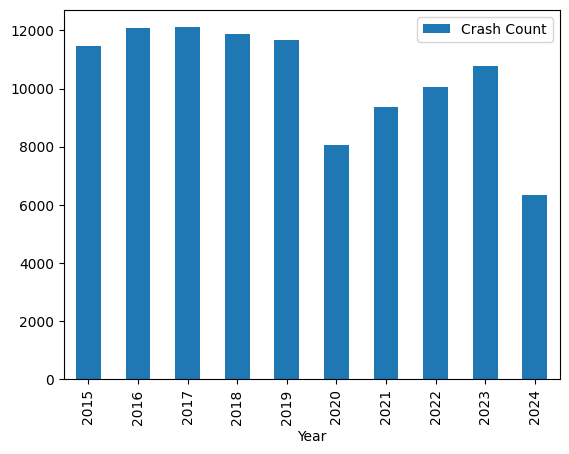

In [13]:
data = pd.read_csv('Crash_Reporting_-_Incidents_Data.csv')
df = data

# création d'un nouveau jeu de données avec la colonne date qui regroupe les années de Crash Date/Time et qui additionne le nombre de crash par année
df['Year'] = pd.to_datetime(df['Crash Date/Time']).dt.year
df_yearly_crashes = df.groupby('Year').size().reset_index(name='Crash Count')
df_yearly_crashes.head()

#nombre totale d'accidents par année
df_yearly_crashes.plot(x='Year', y='Crash Count', kind='bar')


<Axes: ylabel='count'>

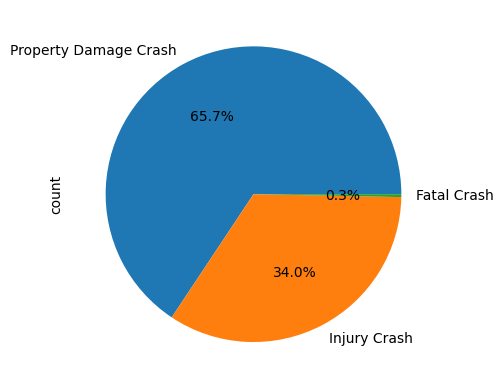

In [14]:
#Pourcentage de chaque type de crash
df['ACRS Report Type'].value_counts().plot.pie(autopct='%1.1f%%')

<Axes: xlabel='Hour'>

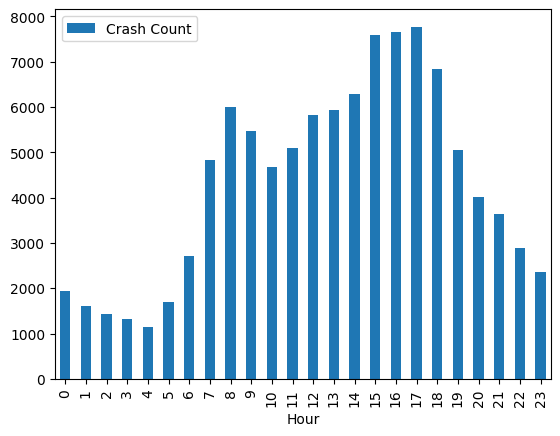

In [15]:
#Histogramme du nombre de crash par heure et par année

df['Hour'] = pd.to_datetime(df['Crash Date/Time']).dt.hour
df_hourly_crashes = df.groupby('Hour').size().reset_index(name='Crash Count')
df_hourly_crashes.plot(x='Hour', y='Crash Count', kind='bar')



<Axes: xlabel='Month'>

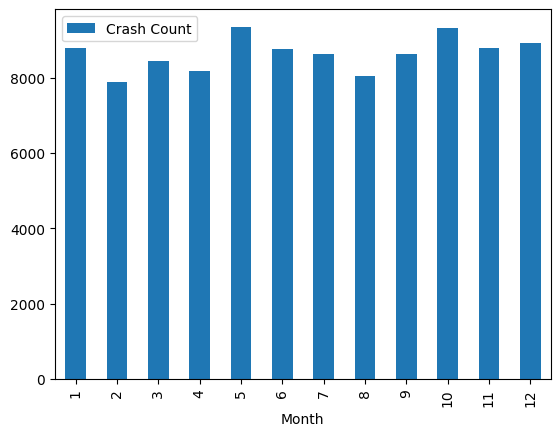

In [16]:
#Histogramme du nombre de crash par mois et par année
df['Month'] = pd.to_datetime(df['Crash Date/Time']).dt.month
df_monthly_crashes = df.groupby('Month').size().reset_index(name='Crash Count')
df_monthly_crashes.plot(x='Month', y='Crash Count', kind='bar')


In [17]:

data = pd.read_csv('Crash_Reporting_-_Incidents_Data.csv')
colonnes = ['ACRS Report Type','Crash Date/Time', 'Hit/Run', 'Route Type', 'Lane Direction',
    'Lane Type', 'Number of Lanes', 'Weather', 'Surface Condition', 'Light',
    'Traffic Control', 'Driver Substance Abuse',
    'Non-Motorist Substance Abuse', 'Collision Type', 'Related Non-Motorist',
    'At Fault', 'First Harmful Event', 'Second Harmful Event', 'Latitude',
    'Longitude', 'Location']
df = data[colonnes]

df.head()


/var/folders/z3/l2fngtm57qb349dkh5432_xw0000gn/T/ipykernel_17499/3750903340.py:1: DtypeWarning: Columns (9,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Crash_Reporting_-_Incidents_Data.csv')


,ACRS Report Type,Crash Date/Time,Hit/Run,Route Type,Lane Direction,Lane Type,Number of Lanes,Weather,Surface Condition,Light,...,Driver Substance Abuse,Non-Motorist Substance Abuse,Collision Type,Related Non-Motorist,At Fault,First Harmful Event,Second Harmful Event,Latitude,Longitude,Location
0,Injury Crash,03/04/2019 08:41:00 AM,No,Maryland (State),West,NaN,2,CLOUDY,DRY,DAYLIGHT,...,NONE DETECTED,NaN,SAME DIR REAR END,NaN,DRIVER,OTHER VEHICLE,NaN,39.113113,-77.057592,"(39.11311333, -77.05759167)"
1,Property Damage Crash,06/04/2016 07:14:00 PM,Yes,County,East,NaN,1,CLEAR,DRY,DAYLIGHT,...,UNKNOWN,NaN,OTHER,NaN,DRIVER,PARKED VEHICLE,OTHER VEHICLE,38.982443,-77.079235,"(38.98244333, -77.079235)"
2,Property Damage Crash,08/18/2015 11:00:00 PM,No,County,South,NaN,2,CLEAR,DRY,DARK LIGHTS ON,...,NONE DETECTED,NaN,OPPOSITE DIRECTION SIDESWIPE,NaN,UNKNOWN,PARKED VEHICLE,NaN,39.189845,-77.230325,"(39.189845, -77.230325)"
3,Injury Crash,08/24/2023 07:46:00 AM,No,Maryland (State),West,NaN,4,CLOUDY,DRY,DAYLIGHT,...,NONE DETECTED,NaN,SINGLE VEHICLE,NaN,DRIVER,NaN,NaN,39.041698,-77.050125,"(39.04169833, -77.050125)"
4,Property Damage Crash,08/12/2023 04:28:00 PM,Yes,NaN,South,NaN,3,NaN,DRY,NaN,...,NaN,NaN,SAME DIRECTION SIDESWIPE,NaN,DRIVER,OTHER VEHICLE,OTHER VEHICLE,39.084720,-77.148200,"(39.08472, -77.1482)"


In [18]:
#création d'une map avec les coordonnées des accidents et leur type de collision
import folium
from folium import plugins

#mise sur la map des points de coordonnées des accidents
map = folium.Map(location=[38.9072, -77.0369], zoom_start=11)


for i in range(0, min(1000, len(df))):
    if i >= len(df):
        break
    folium.Marker([df.iloc[i]['Latitude'], df.iloc[i]['Longitude']], popup=df.iloc[i]['Collision Type']).add_to(map)
    

map

In [19]:
# map des accident par type de collision et sur l'année 2019
df = data
df['Year'] = pd.to_datetime(df['Crash Date/Time']).dt.year
df = df[df['Year'] == 2019]



map = folium.Map(location=[38.9072, -77.0369], zoom_start=11)

for i in range(0, min(1000, len(df))):
    if i >= len(df):
        break
    folium.Marker([df.iloc[i]['Latitude'], df.iloc[i]['Longitude']], popup=df.iloc[i]['Collision Type']).add_to(map)

map

In [20]:
#création d'une heatmap avec les coordonnées des accidents
from folium.plugins import HeatMap

map = folium.Map(location=[38.9072, -77.0369], zoom_start=11)

heat_df = df[['Latitude', 'Longitude']]
heat_df = heat_df.dropna(axis=0, subset=['Latitude','Longitude'])

heat_data = [[row['Latitude'],row['Longitude']] for index, row in heat_df.iterrows()]

HeatMap(heat_data).add_to(map)

map

In [21]:
#récupération des données du CSV
data = pd.read_csv('Crash_Reporting_-_Incidents_Data.csv')

#création d'un dataframe avec les colonnes qui nous intéressent
colonnes = ['ACRS Report Type','Crash Date/Time', 'Hit/Run', 'Route Type', 'Lane Direction',
    'Lane Type', 'Number of Lanes', 'Weather', 'Surface Condition', 'Light',
    'Traffic Control', 'Driver Substance Abuse',
    'Non-Motorist Substance Abuse', 'Collision Type', 'Related Non-Motorist',
    'At Fault', 'First Harmful Event', 'Second Harmful Event', 'Latitude',
    'Longitude', 'Location']
df = data[colonnes]


#création d'un jeux de données sur l'année 2020 uniquement


df['Year'] = pd.to_datetime(df['Crash Date/Time']).dt.year
df = df[df['Year'] == 2018]

df.head()
df.shape


/var/folders/z3/l2fngtm57qb349dkh5432_xw0000gn/T/ipykernel_17499/3498950008.py:2: DtypeWarning: Columns (9,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Crash_Reporting_-_Incidents_Data.csv')
/var/folders/z3/l2fngtm57qb349dkh5432_xw0000gn/T/ipykernel_17499/3498950008.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = pd.to_datetime(df['Crash Date/Time']).dt.year


(11869, 22)

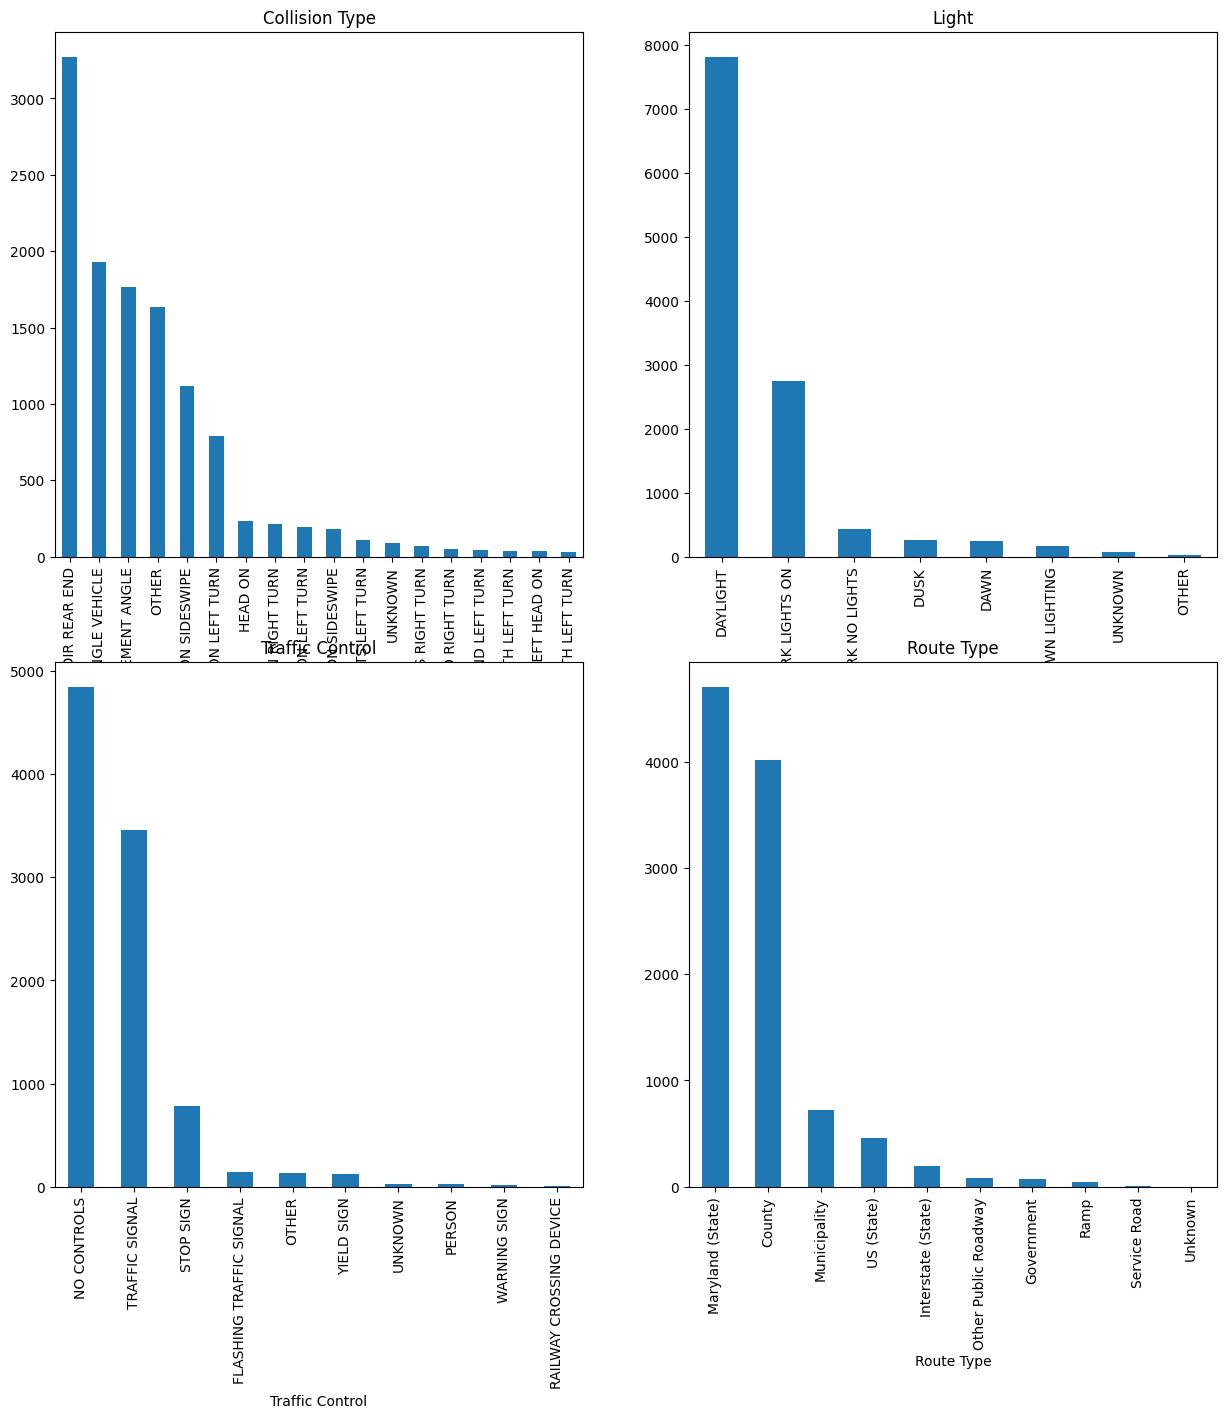

In [22]:
#création d'un graphique de 4 figures différentes avec les accidents par type de collision, par type de lumière, par type de trafic et par type de route
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(15, 15))

df['Collision Type'].value_counts().plot(kind='bar', ax=axs[0, 0], title='Collision Type')
df['Light'].value_counts().plot(kind='bar', ax=axs[0, 1], title='Light')
df['Traffic Control'].value_counts().plot(kind='bar', ax=axs[1, 0], title='Traffic Control')
df['Route Type'].value_counts().plot(kind='bar', ax=axs[1, 1], title='Route Type')

plt.show()


/var/folders/z3/l2fngtm57qb349dkh5432_xw0000gn/T/ipykernel_17499/896531719.py:2: DtypeWarning: Columns (9,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Crash_Reporting_-_Incidents_Data.csv')


01/01/2015 01:10:00 AM
12/31/2023 12:19:00 AM


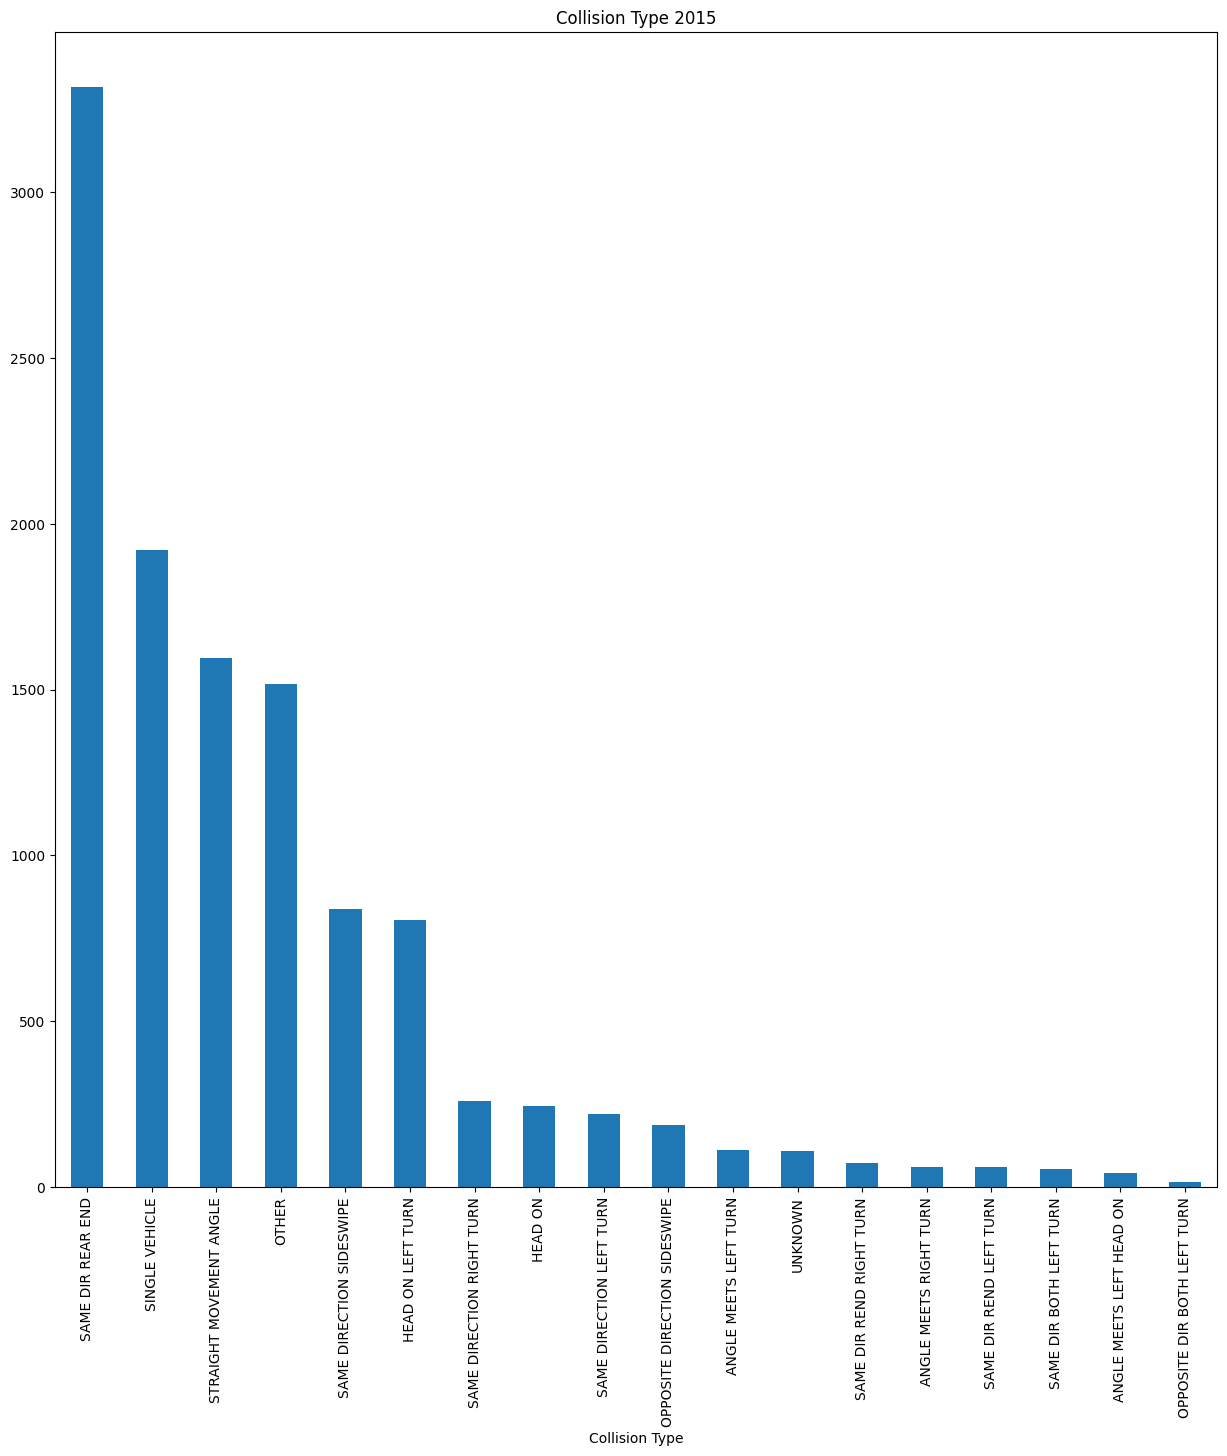

In [23]:
#importation du fichier CSV en entier
data = pd.read_csv('Crash_Reporting_-_Incidents_Data.csv')

#récupération de la plus petite date et de la plus grande date
print(data['Crash Date/Time'].min())
print(data['Crash Date/Time'].max())


#création d'un dataset avec les données de l'année 2015
df = data
df['Year'] = pd.to_datetime(df['Crash Date/Time']).dt.year
df = df[df['Year'] == 2015]

df.head()

#création d'un graphique avec les accidents par type de collision sur l'année 2015
fig, axs = plt.subplots(1, 1, figsize=(15, 15))

df['Collision Type'].value_counts().plot(kind='bar', ax=axs, title='Collision Type 2015')

plt.show()




/var/folders/z3/l2fngtm57qb349dkh5432_xw0000gn/T/ipykernel_17499/2364678113.py:2: DtypeWarning: Columns (9,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Crash_Reporting_-_Incidents_Data.csv')


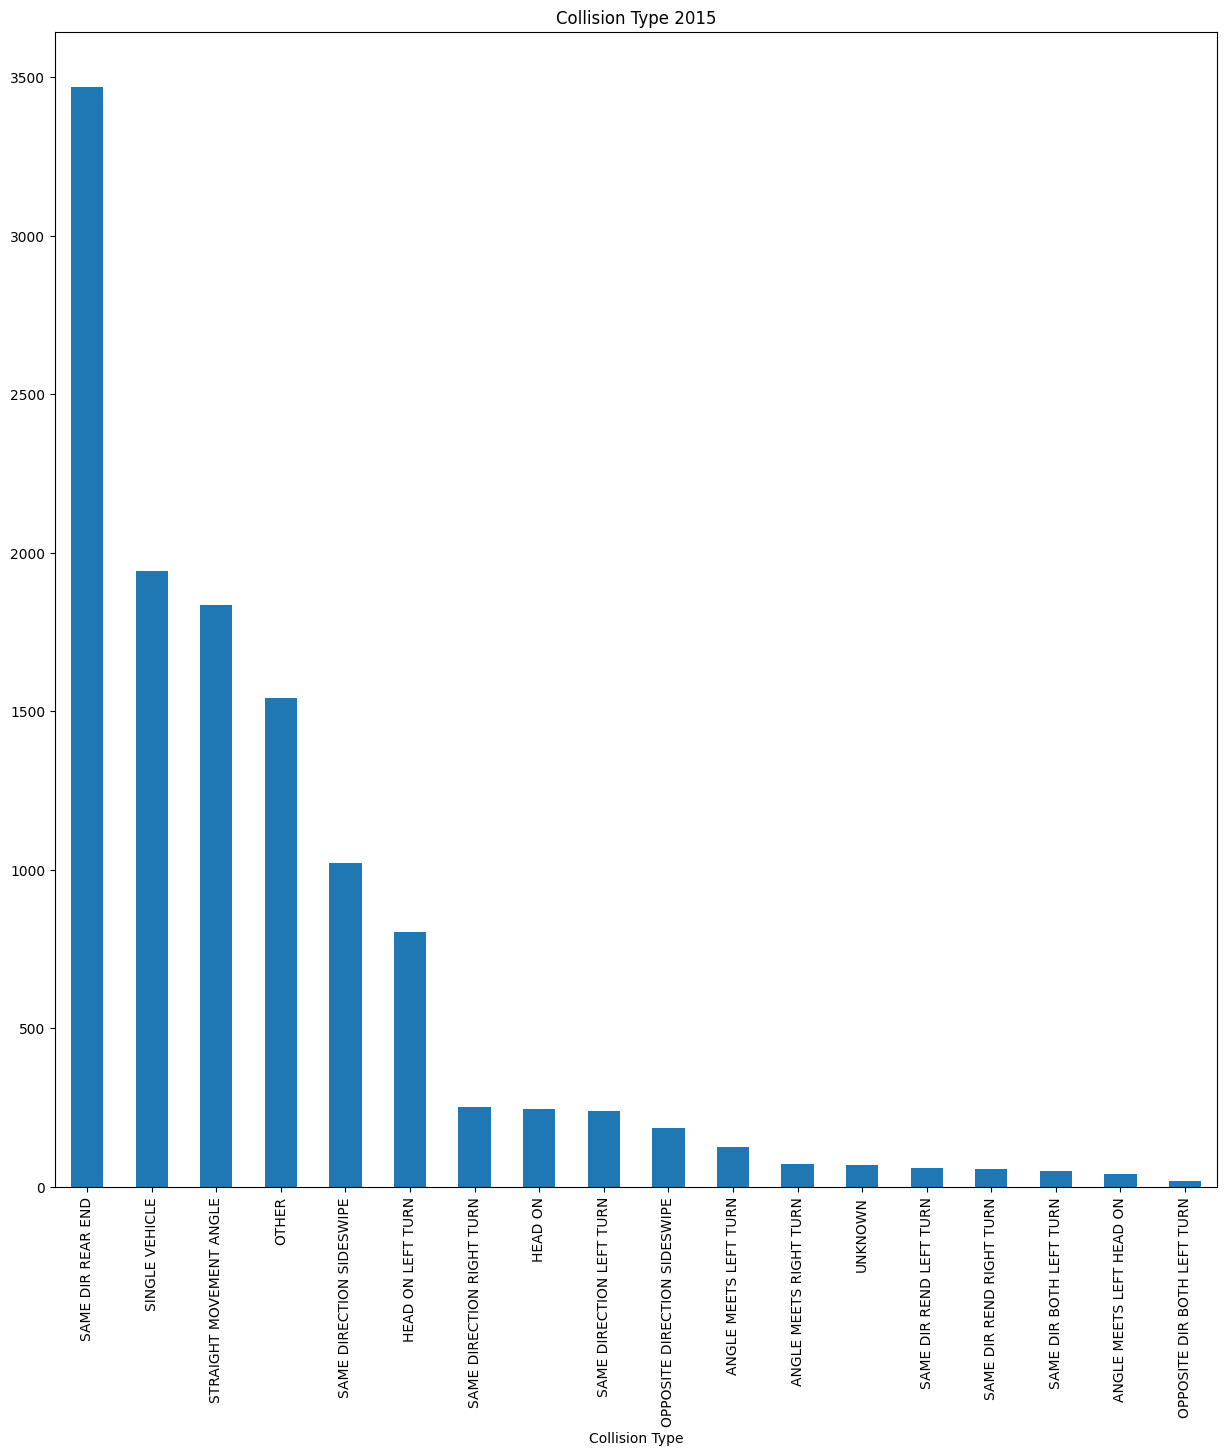

In [24]:

#importation du fichier CSV en entier
data = pd.read_csv('Crash_Reporting_-_Incidents_Data.csv')


#création d'un dataset avec les données de l'année 2015
df = data
df['Year'] = pd.to_datetime(df['Crash Date/Time']).dt.year
df = df[df['Year'] == 2016]

df.head()

#création d'un graphique avec les accidents par type de collision sur l'année 2015
fig, axs = plt.subplots(1, 1, figsize=(15, 15))

df['Collision Type'].value_counts().plot(kind='bar', ax=axs, title='Collision Type 2015')

plt.show()


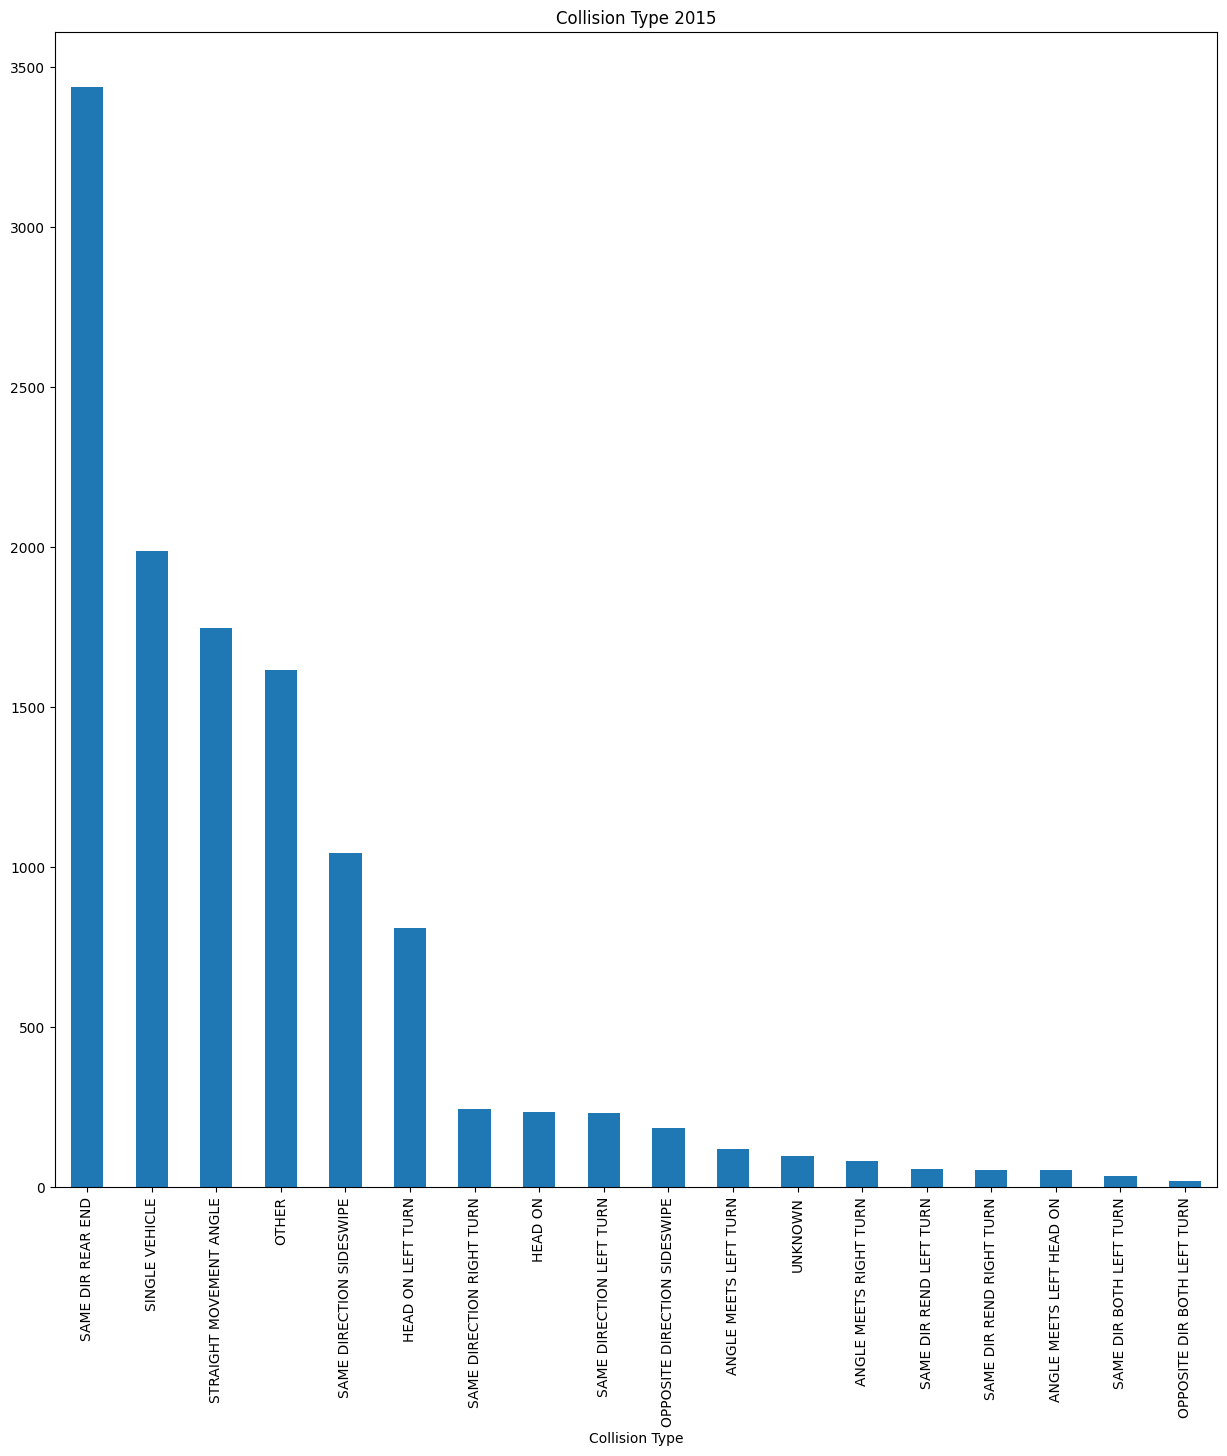

In [25]:
#création d'un dataset avec les données de l'année 2015
df = data
df['Year'] = pd.to_datetime(df['Crash Date/Time']).dt.year
df = df[df['Year'] == 2017]

df.head()

#création d'un graphique avec les accidents par type de collision sur l'année 2015
fig, axs = plt.subplots(1, 1, figsize=(15, 15))

df['Collision Type'].value_counts().plot(kind='bar', ax=axs, title='Collision Type 2015')

plt.show()

/var/folders/z3/l2fngtm57qb349dkh5432_xw0000gn/T/ipykernel_17499/498050675.py:2: DtypeWarning: Columns (9,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Crash_Reporting_-_Incidents_Data.csv')


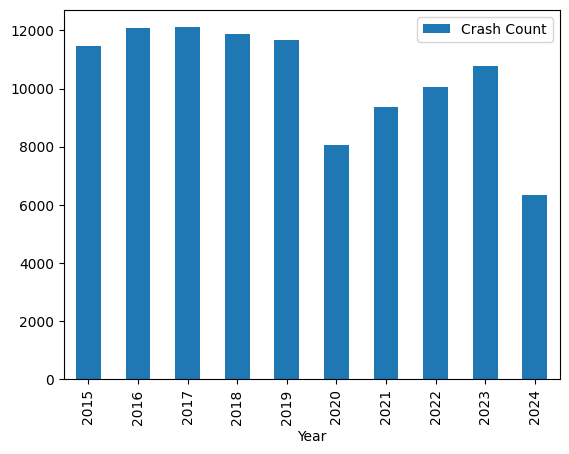

In [26]:
#importation du fichier CSV en entier
data = pd.read_csv('Crash_Reporting_-_Incidents_Data.csv')

#Histogramme du nombre de crash par année
df = data
df['Year'] = pd.to_datetime(df['Crash Date/Time']).dt.year

df_yearly_crashes = df.groupby('Year').size().reset_index(name='Crash Count')
df_yearly_crashes.plot(x='Year', y='Crash Count', kind='bar')


plt.show()

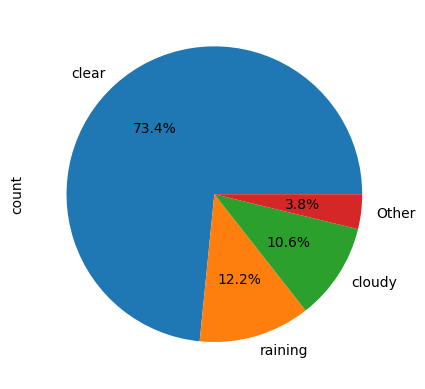

In [27]:
#calcul en % des accidents par conditions météorologiques dans un nouveau dataset
df = data
df['Weather'].value_counts(normalize=True) * 100

#Mettre les noms en miniuscule
df['Weather'] = df['Weather'].str.lower()

#si le % de conditions météorologiques est inférieur à 1%, on remplace la valeur par 'Other'
threshold = 1
df['Weather'] = df['Weather'].mask(df['Weather'].map(df['Weather'].value_counts(normalize=True) * 100) < threshold, 'Other')

#Fusionner les valeurs CLEAR et Clear en une seule valeur
df['Weather'] = df['Weather'].replace('CLEAR', 'Clear')

#création d'un graphique en camembert avec les accidents par conditions météorologiques
df['Weather'].value_counts().plot.pie(autopct='%1.1f%%')

plt.show()

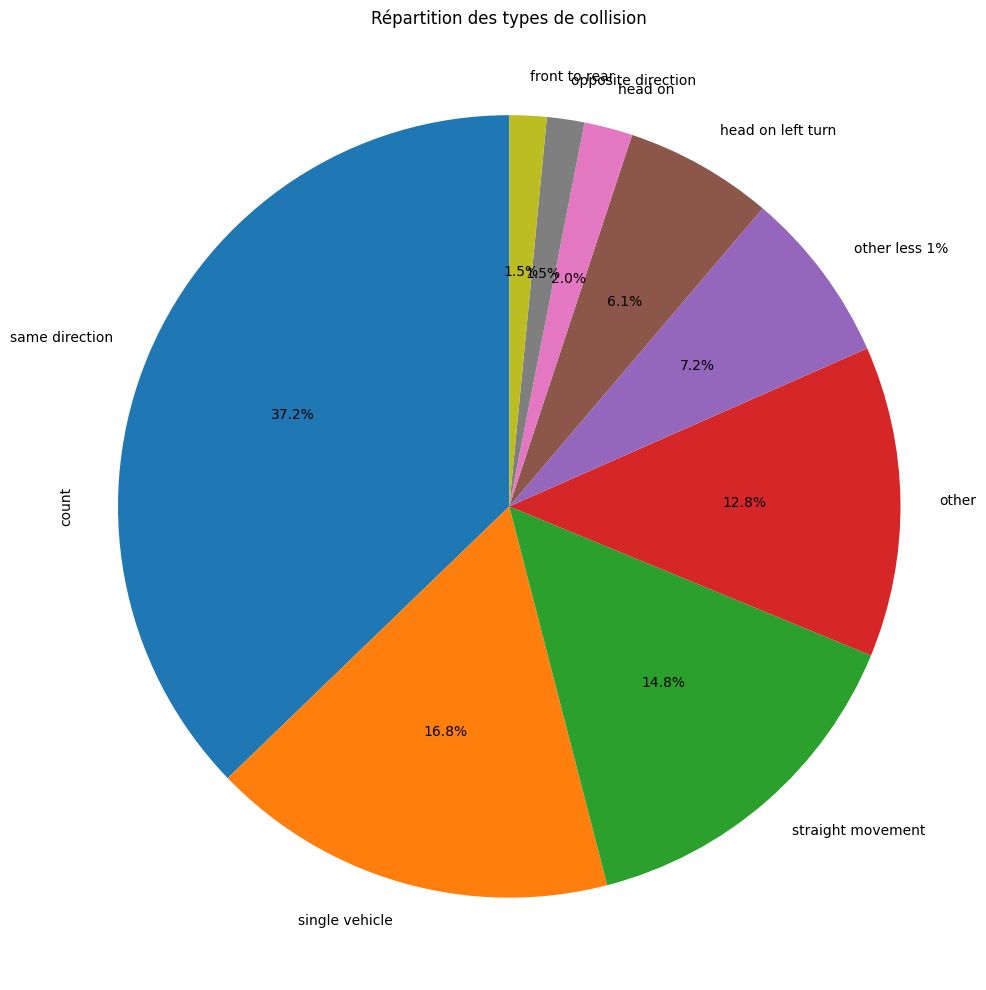

In [34]:
# Optimisation du code pour le traitement des types de collision

# Dictionnaire de remplacement pour les types de collision
collision_type_mapping = {
    'SINGLE VEHICLE': 'single vehicle',
    'SAME DIRECTION SIDESWIPE': 'same direction',
    'SAME DIRECTION LEFT TURN': 'same direction',
    'SAME DIRECTION RIGHT TURN': 'same direction',
    'SAME DIR REAR END': 'same direction',
    'OPPOSITE DIRECTION SIDESWIPE': 'opposite direction',
    'OPPOSITE DIRECTION REAR END': 'opposite direction',
    'STRAIGHT MOVEMENT ANGLE': 'straight movement'
}

# Application du mapping et conversion en minuscules
df['Collision Type'] = df['Collision Type'].replace(collision_type_mapping).str.lower()

# Regroupement des types de collision peu fréquents
threshold = 1
value_counts = df['Collision Type'].value_counts(normalize=True) * 100
df['Collision Type'] = df['Collision Type'].mask(df['Collision Type'].map(value_counts) < threshold, 'other less 1%')

# Création du diagramme en secteurs
plt.figure(figsize=(10, 10))
df['Collision Type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Répartition des types de collision")
plt.axis('equal')
plt.tight_layout()
plt.show()

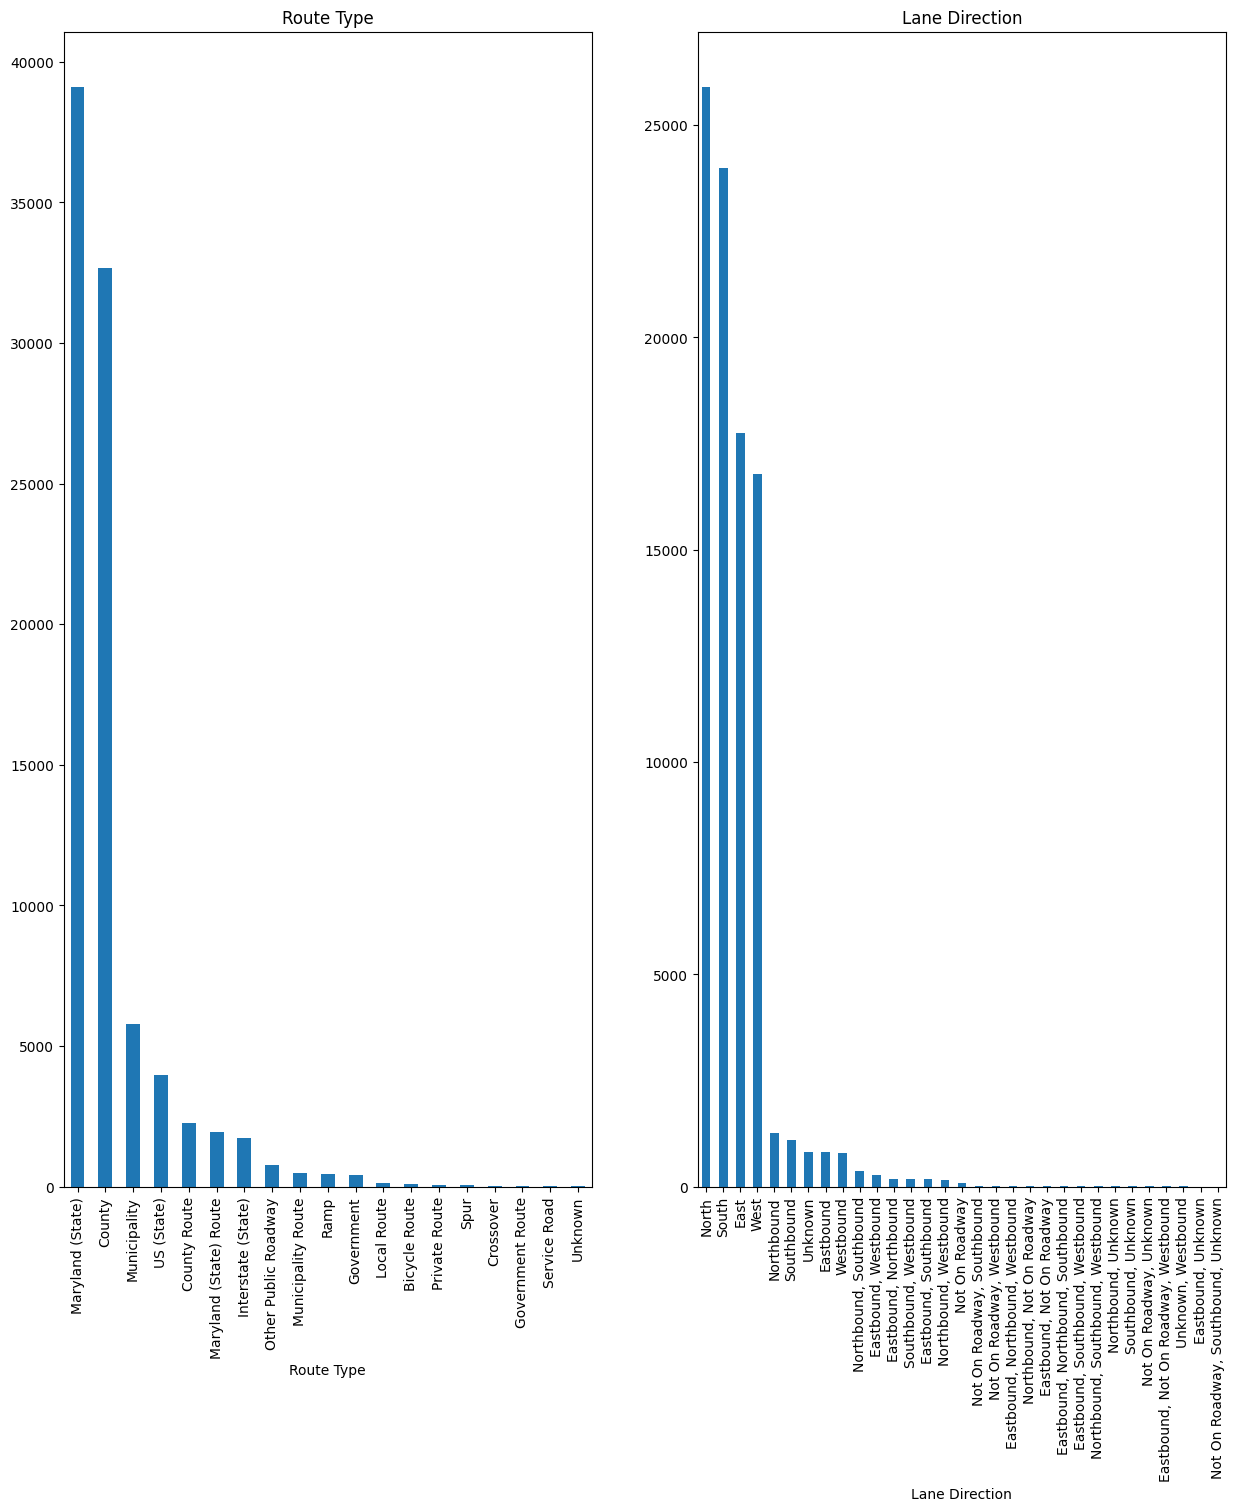

In [29]:
#Graphique en barres ou en secteurs pour analyser l'impact du type de route et de la direction des voies sur les accidents.
fig, axs = plt.subplots(1, 2, figsize=(15, 15))

df['Route Type'].value_counts().plot(kind='bar', ax=axs[0], title='Route Type')
df['Lane Direction'].value_counts().plot(kind='bar', ax=axs[1], title='Lane Direction')

plt.show()

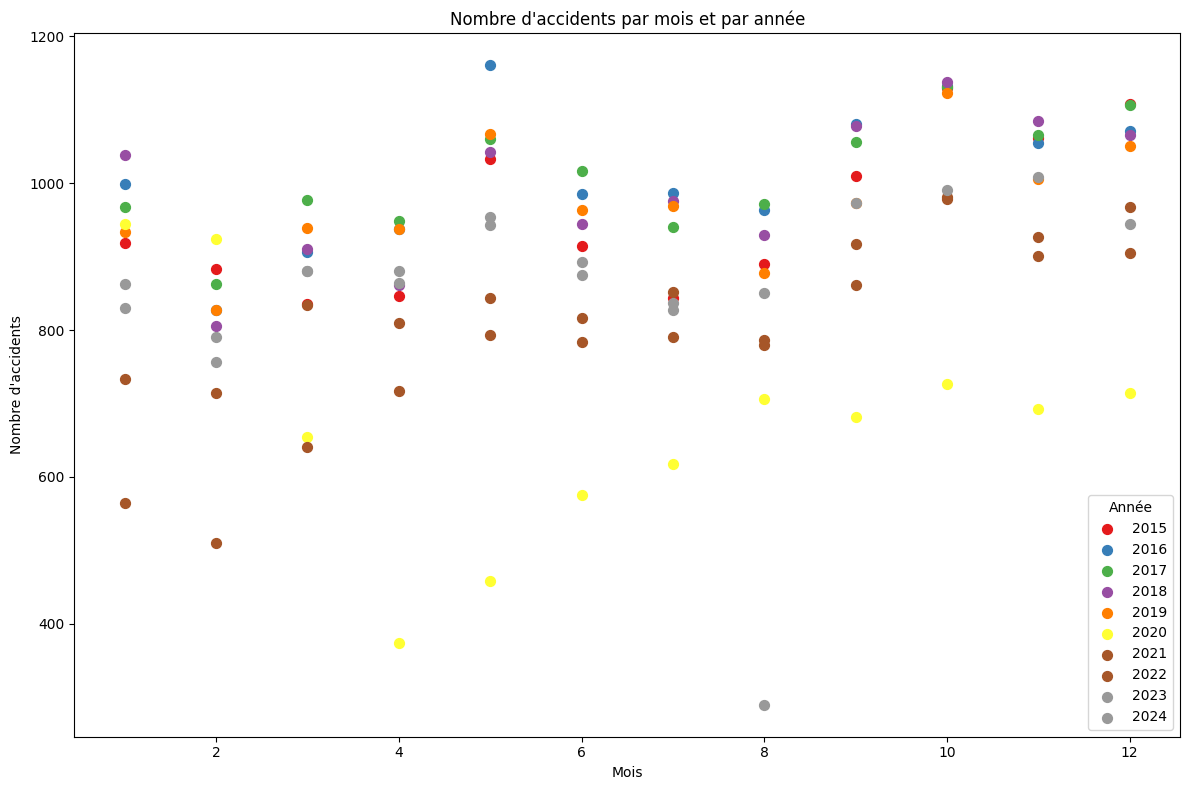

In [32]:
#création d'un dataset sur le nombre d'accidents par mois et par année
df = data
df['Year'] = pd.to_datetime(df['Crash Date/Time']).dt.year
df['Month'] = pd.to_datetime(df['Crash Date/Time']).dt.month

df_monthly_crashes = df.groupby(['Year', 'Month']).size().reset_index(name='Crash Count')
df_monthly_crashes.head()

#Mise des noms des mois

#Création d'un graphique à point reprennant le nombre d'accidents par mois et par année en différenciant les années pas couleurs

# Créer une liste de couleurs distinctes pour chaque année
années_uniques = df_monthly_crashes['Year'].unique()
couleurs = plt.cm.Set1(np.linspace(0, 1, len(années_uniques)))

# Créer le graphique
fig, ax = plt.subplots(figsize=(12, 8))

for année, couleur in zip(années_uniques, couleurs):
    données_année = df_monthly_crashes[df_monthly_crashes['Year'] == année]
    ax.scatter(données_année['Month'], données_année['Crash Count'], 
               c=[couleur], label=str(année), s=50)

ax.set_xlabel('Mois')
ax.set_ylabel("Nombre d'accidents")
ax.set_title("Nombre d'accidents par mois et par année")
ax.legend(title='Année')

plt.tight_layout()

plt.show()
